In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data
data = pd.read_csv('data/HCV-Egy-Data.csv')

In [3]:
# Number of numerical and categorical features
print("Number of numerical features", len(data.select_dtypes(exclude='object').columns))
cat_features = data.select_dtypes(include='object').columns
print("Number of categorical features", len(cat_features))
print(cat_features)

Number of numerical features 29
Number of categorical features 0
Index([], dtype='object')


In [4]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [5]:
# Separate features
X = data.drop(['Baselinehistological staging'], axis=1)
y = data['Baselinehistological staging']

In [6]:
# Check distribution of target classes
y.value_counts()

Baselinehistological staging
4    362
3    355
1    336
2    332
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [9]:
# Initialize Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [10]:
# Define k for k-fold cross-validation
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [11]:
# Lists to store metrics
accuracies = []
precisions = []
recalls =[]
f1_scores = []
conf_matricies = []
y_probas = []
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    conf_matricies.append(conf_matrix)
    if len(y_probas) < 1:
        y_probas = model.predict_proba(X_test)
    else:
        y_probas = y_probas + model.predict_proba(X_test)

In [13]:
# Calculate and print the average metrics
import numpy as np
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")

# Aggregate confusion matrix
average_conf_matrix = np.sum(conf_matricies, axis=0)
print("Aggregated Confusion Matrix:")
print(average_conf_matrix)

Average Accuracy: 0.2671
Average Precision: 0.2649
Average Recall: 0.2671
Average F1 Score: 0.2609
Aggregated Confusion Matrix:
[[ 56  93  87 100]
 [ 58  88  84 102]
 [ 68  79  97 111]
 [ 59  84  90 129]]


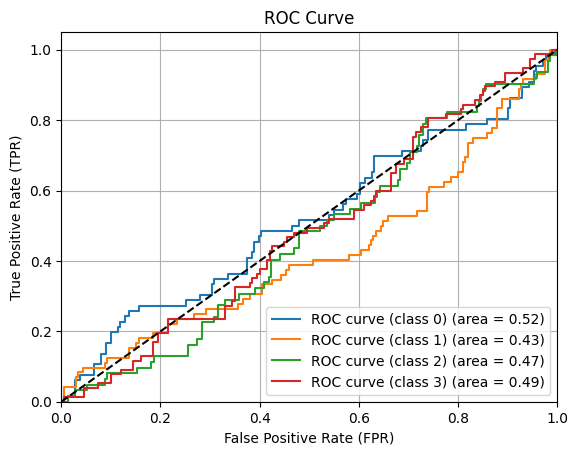

In [15]:
# Get class probabilities for the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot the ROC curve for each class
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], label = roc_curve(y_test == i, y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc='lower right')
plt.show()